In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=1)

In [5]:
print (dataset), print (metadata)

{'test': <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>, 'train': <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}
tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vol

(None, None)

In [73]:
train_dataset, test_dataset = dataset['train'], dataset['test']
num_train_ex = metadata.splits['train'].num_examples
num_test_ex = metadata.splits['test'].num_examples
num_train_ex, num_test_ex

(60000, 10000)

In [74]:
class_names = {
0:'Top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'AnkleBoot'}

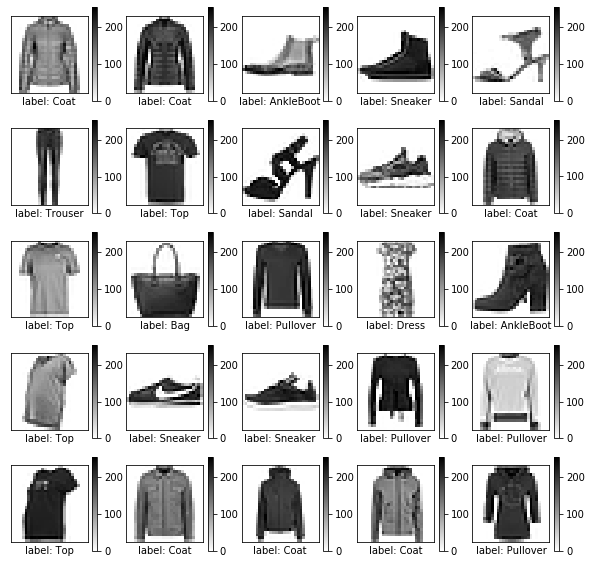

In [54]:
plt.figure(figsize=(10, 10))
i=0
for image, label in test_dataset.take(25):
    image = image.numpy().reshape(28,28)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(0)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel(f'label: {class_names[label.numpy()]}')
    i+=1
plt.show()

In [55]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

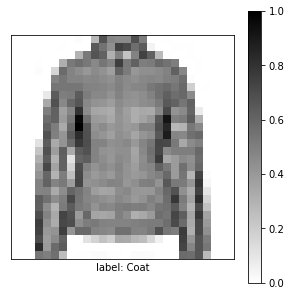

In [58]:
plt.figure(figsize=(5, 5))
i=0
for image, label in test_dataset.take(1):
    image = image.numpy().reshape(28,28)
    plt.subplot(1, 1, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(0)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel(f'label: {class_names[label.numpy()]}')
    i+=1
plt.show()

In [126]:
def get_model(input_shape, optimizer, loss, metrics):
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(192, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') #multiClass; binary:sigmoid
                ])
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=metrics)
    print (f"Model Summary\n{model.summary()}")
    return model

model = get_model(input_shape=(28, 28, 1),
                  optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 192)               150720    
_________________________________________________________________
dense_42 (Dense)             (None, 10)                1930      
Total params: 152,650
Trainable params: 152,650
Non-trainable params: 0
_________________________________________________________________
Model Summary
None


In [127]:
def train_model(model, train_set, epochs, batch_size, buffer_size, steps_per_epoch):
    train_set = train_set.repeat().shuffle(buffer_size).batch(batch_size)
    history = model.fit(train_set, epochs=epochs, steps_per_epoch=steps_per_epoch)
    return history

history = train_model(model, 
                      train_dataset, 
                      epochs=5, 
                      batch_size=32, 
                      buffer_size=num_train_ex,
                      steps_per_epoch=math.ceil(num_train_ex/32))


Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 4.0476 - accuracy: 0.6999
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6637 - accuracy: 0.7531
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5749 - accuracy: 0.7914
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5348 - accuracy: 0.8057
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5237 - accuracy: 0.8172


In [125]:
test_dataset = test_dataset.batch(BATCH_SIZE)
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_ex/32))
print (f"TestSet Accuracy: {test_accuracy:.3f}")

ValueError: in converted code:

    /Users/d-wdj/Google Drive/Hacktiv8/env/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2.py:677 map_fn
        batch_size=None)
    /Users/d-wdj/Google Drive/Hacktiv8/env/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training.py:2410 _standardize_tensors
        exception_prefix='input')
    /Users/d-wdj/Google Drive/Hacktiv8/env/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_utils.py:573 standardize_input_data
        'with shape ' + str(data_shape))

    ValueError: Error when checking input: expected flatten_17_input to have 4 dimensions, but got array with shape (None, None, None, None, 28, 28, 1)


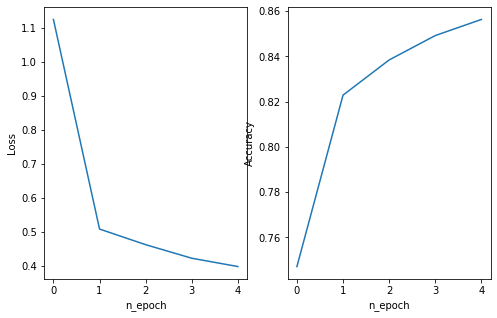

In [109]:
plt.figure(figsize=(5, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.xlabel('n_epoch')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.xlabel('n_epoch')
plt.ylabel('Accuracy')
plt.show()

ValueError: in converted code:

    /Users/d-wdj/Google Drive/Hacktiv8/env/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2.py:677 map_fn
        batch_size=None)
    /Users/d-wdj/Google Drive/Hacktiv8/env/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training.py:2410 _standardize_tensors
        exception_prefix='input')
    /Users/d-wdj/Google Drive/Hacktiv8/env/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_utils.py:573 standardize_input_data
        'with shape ' + str(data_shape))

    ValueError: Error when checking input: expected flatten_11_input to have 4 dimensions, but got array with shape (None, None, 28, 28, 1)


In [100]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(0)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[..., 0], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label: color='blue'
    else: color='red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(0)
    plt.xticks([x for x in range(0, 10)])

    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1.05])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [101]:
for img, label in test_dataset.take(1):
    img = img.numpy()
    label = label.numpy()
    predictions = model.predict([img])

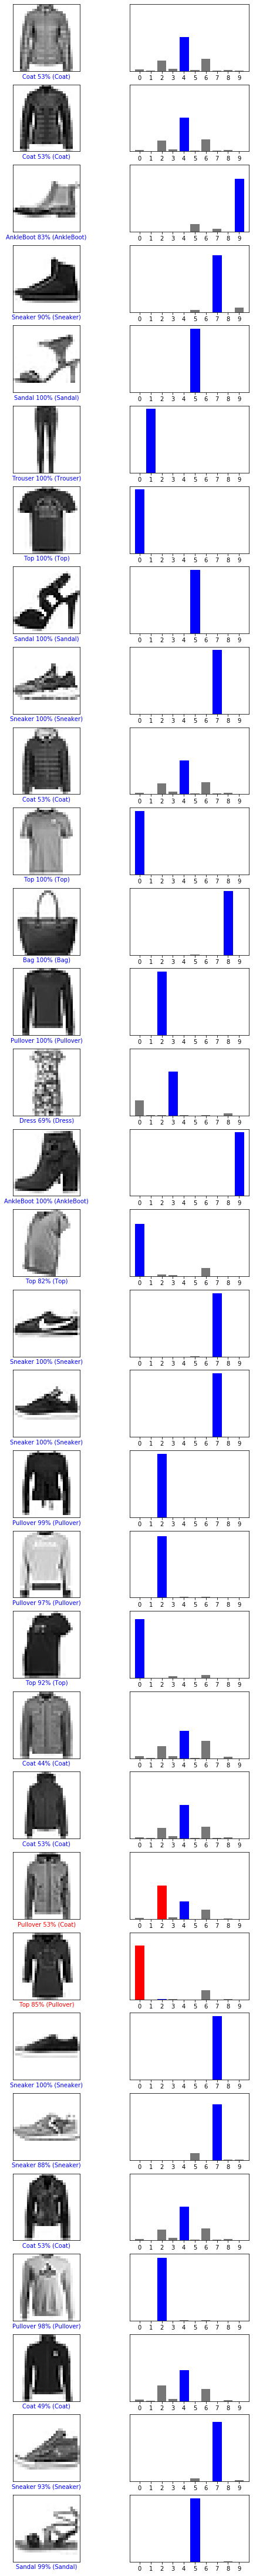

In [104]:
npred = predictions.shape[0]
plt.figure(figsize=(8,math.ceil(npred*2.5)))
i = 1
for n in range(0, predictions.shape[0]):
    
    plt.subplot(npred, 2, i)
    i += 1
    plot_image(n, predictions, label, img)
    plt.subplot(npred, 2, i)
    i += 1
    plot_value_array(n, predictions, label)

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 2, input_shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),#input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax') #multiClass; binary:sigmoid
])
print (model.summary())
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 27, 27, 10)        50        
_________________________________________________________________
flatten_7 (Flatten)          (None, 7290)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               933248    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 934,588
Trainable params: 934,588
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_ex).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [61]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_ex/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4229 - accuracy: 0.8484
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3009 - accuracy: 0.8917
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2486 - accuracy: 0.9083
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2076 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1700 - accuracy: 0.9383


In [62]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_ex/BATCH_SIZE))
print (f"TestSet Accuracy: {test_accuracy:.3f}")

313/313 [==============================] - 4s 12ms/step - loss: 0.3953 - accuracy: 0.8779
TestSet Accuracy: 0.878
